# Turbine Governor Modeling

In [1]:
import matplotlib.pyplot as plt

import andes

In [2]:
%matplotlib inline

In [3]:
andes.config_logger(stream_level=40)

In [4]:
ss = andes.load('./../TGOV1/ieee39_TGOV1N.xlsx',
                  setup=False,
                  no_output=True,
                  default_config=True)

In [5]:
ss.add(model='Alter', param_dict=dict(t=1, model='PQ', dev='PQ_1', src='Ppf',
                                      attr='v', method='+', amount=0.1))
ss.setup()
ss.Toggle.set(src='u', attr='v', value=0, idx="Toggler_1")

ss.PQ.config.p2p = 1
ss.PQ.config.q2q = 1
ss.PQ.config.p2z = 0
ss.PQ.config.q2z = 0

ss.PFlow.run()
# turn off under-voltage PQ-to-Z conversion
ss.PQ.pq2z = 0

ss.TDS.config.tf = 50
ss.TDS.config.criteria = 0
ss.TDS.config.no_tqdm = True
ss.TDS.run()

<Alter Alter_2>: set PQ.PQ_1.Ppf.v=6.1 at t=1. Previous value was 6.


True

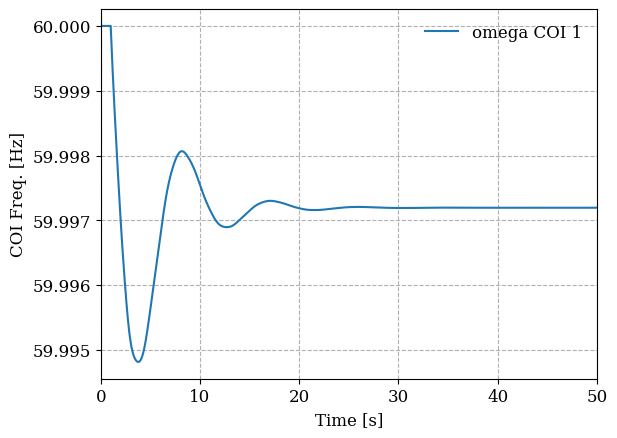

In [6]:
_ = ss.TDS.plt.plot(ss.COI.omega,
                    line_width=1.5,
                    latex=False,
                    show=False,
                    ytimes=ss.config.freq,
                    grid=True,
                    ylabel='COI Freq. [Hz]')